In [1]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

## The MNIST Digist Database

The dataset we use in this project is the dataset of handwritten digits. It is taken as a pickle file. The dataset consists of 70 thousands observations. Each entry is a 28 by 28 pixel image represented by a 784-dimensional vector.

The dataset is split into 50000 trining elements, 10000 validation and 10000 test observations.

The labels for the objservations are between 0 and 9, i.e., there are 10 classes.

Each feature component (pixel) is a float value between 0.0 and 1.0 that is the intensity of the pixel, 0.0 is black, 1.0 is white.

In [42]:
current_path = os.getcwd()
file = '\\datasets\\mnist_data\\mnist.pkl.gz'

with gzip.open(current_path + file, 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')


X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]


In [43]:
# Verify shape of datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [44]:
train_index = range(0, len(X_train))
validation_index = range(len(X_train), \
                         len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), \
                   len(X_train)+len(X_validation)+len(X_test))
print(f'Train index: {train_index}')
print(f'Validation index: {validation_index}' )
print(f'Test index: {test_index}', )

Train index: range(0, 50000)
Validation index: range(50000, 60000)
Test index: range(60000, 70000)


In this step we create `pandas` DataFrames out of `numpy` arrays with indes values that we set up before.
The labels are converted into `pandas` Series:

In [45]:
type_x_train_orig = type(X_train)
type_y_train_orig = type(y_train)
print(type_x_train_orig)
print(type_y_train_orig)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [46]:
X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

print(type(y_train))
print(type(X_train))
print(X_train.index)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex(start=0, stop=50000, step=1)


In [47]:
X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

In [48]:
# Describe the training matrix
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


We can see, that the first and the last features are black pixels: their mean, min, and max values are all 0.0. That is to be expected. A higher value variety can be seen in the middle of the feature list.

Let's output the first labels in the training dataset:

In [49]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

We can look at the iages on the dtaset by plotting their vectors:

In [53]:
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example, :].values.reshape([28, 28])
    plt.title(f'Example: {example} Label: {label}')
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

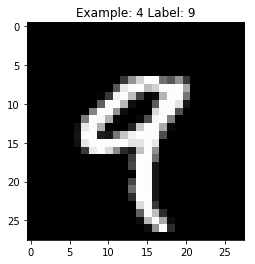

In [56]:
view_digit(4)

## Dimensionality Reduction Algorithms

The  dimensionality reduction algorithms can be divided into tw main groups: __linear projection__ and __manifold learning__ (or __nonlinear dimensionality reduction__).

Examples of the first group are __priciple component analysis__ (PCA), __singular value decomposition__ (SVD), and __random projections__.

Examples of the second group include: 
- __isomap__: this technique learns curved (or geodesic) distance between points rather than the Euclidean distance.
- __multidimensional scaling__ (MDS)
- __local linear embeddings__
- __t-distributed stochastic neighbor embedding__ (t-SNE)
- __dictionary learning__
- __random trees embedding__
- __independent component analysis__

### PCA

We first expore several versions of PCA: standard, incremental, sparse, and kernel.

The goal of PCA is to reduce the number of features (dimensions) while retaining as much variation (salient information) as possible.

This is done by finding groups of correlated features. They are combined so that a lower number of linearly uuncorrelated features are created. The process involves projecting  higher dimensional data into lower dimensional space.

It is possible to reconstruct the original features from the reduced versions, although not completely.

The reduced features are called _principal components_.

The MNIST dataset has 784 features. We will try to redce this number by applying PCA. Alhtough some information will be lost, the remaining wll still represent the original data close enough. In the same time, the lower number of features will allo us to perform clustering and anomaly detection much more effective.

#### Feature Scaling

Feature scaling is essential for the correct work of PCA algorithms that are very sensitive to the original features' ranges. In the MNIST dataset all features are already in the same range of 0.0 to 1.0, so we can skip this step.

### Apply  PCA

We import `PCA` and set up the hyper parameters. The parameter `whiten` is explained in the PCA docs: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [57]:
# Principal Component Analysis
from sklearn.decomposition import PCA

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

With `n_components` set to 784 we do not reduce the dimensionality, we only transform the data. Still 100% of the variance must be retained:

In [58]:
# Percentage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  0.9999999999999998


This transformation allows us to evaluate the importance of features:


In [60]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)


importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.48876238]
Variance Captured by First 20 Principal Components:  [0.64398025]
Variance Captured by First 50 Principal Components:  [0.8248609]
Variance Captured by First 100 Principal Components:  [0.91465857]
Variance Captured by First 200 Principal Components:  [0.96650076]
Variance Captured by First 300 Principal Components:  [0.9862489]


One can see, that with the first 100 most important components we already capture 91% variance and with the first 300 - 98%.

We can visualize the importance of the first 10 comnponents using this chart. The _y_ axis represent the proportion of the explained variance.

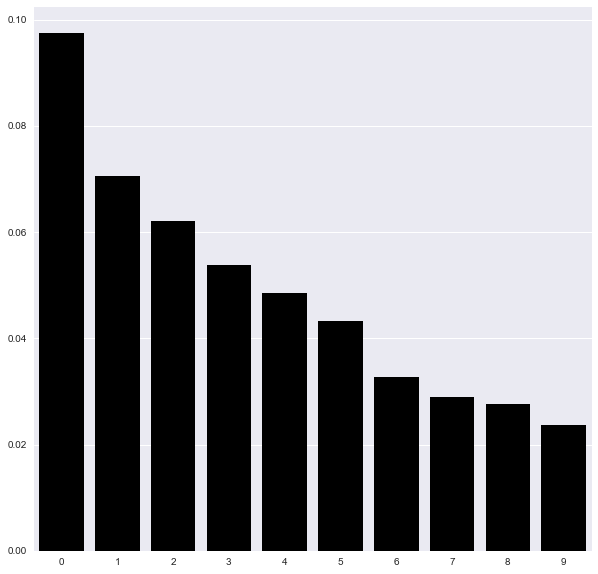

In [62]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:9],color='k');

Lets try mapping our dataset using two dimensions provided by the first two most important components.

In [63]:
def scatterPlot(xDF, yDF, algoName):
    # take othe first two columns only
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    
    # join the labels
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

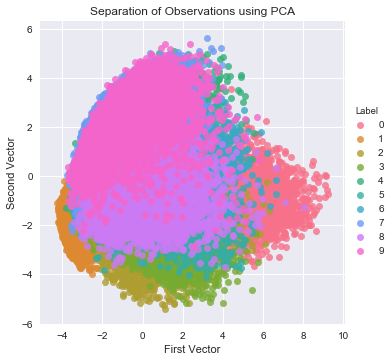

In [64]:
scatterPlot(X_train_PCA, y_train, "PCA")

We can see that the fist two components do quite a good job separating the labels. This separation is learned without using the original labels. This is the power of PCA.

We can compare this graph with a similar one created out of the originial, non-PCA-transformed data. We take two features representing pixels in the center of the image:

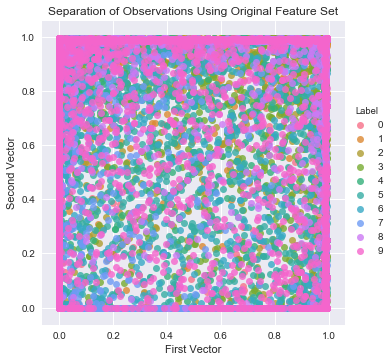

In [66]:
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,406]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations Using Original Feature Set");

The label separation is much less obvious, almost indistinguishable from noise.

### Incremental PCA

For datasets that are too large to fit in memory, we can use PCA incrementally. We define small batches of data (manually or automatically). This batch-processed PCA is called __incremental PCA__.

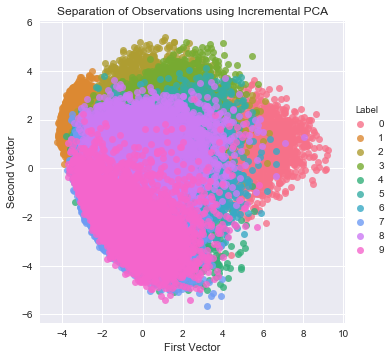

In [78]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA

n_components = 784
batch_size = None

incrementalPCA = IncrementalPCA(n_components=n_components, \
                                batch_size=batch_size)

X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)

X_train_incrementalPCA = \
    pd.DataFrame(data=X_train_incrementalPCA, index=train_index)


X_validation_incrementalPCA = incrementalPCA.transform(X_validation)

X_validation_incrementalPCA = \
    pd.DataFrame(data=X_validation_incrementalPCA, index=validation_index)

scatterPlot(X_train_incrementalPCA, y_train, "Incremental PCA")

## Sparse PCA

The regular PCA looks for linear combinations of all the input variables and reduced the original space as densely as possible.

For some machine learning algorithms, some degree of sparsity may be preferred. There is a version of PCA that controls the sparsity using the parameter `alpha`: __sparse PCA__.

The sparse PCA searacher for linear combinations in just some of the input variables. The original feature space is reduced not as densely ans with normal PCA.

Sparse PCA runs more slowly than the regular. So we train it only on the first 10000 samples because we only need to demonstrate it.

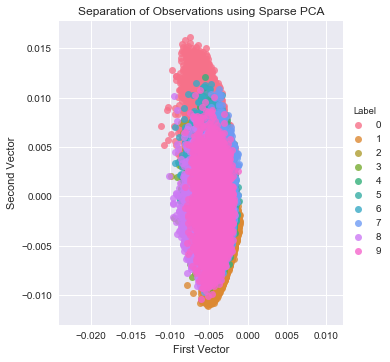

In [79]:
# Sparse PCA
from sklearn.decomposition import SparsePCA

n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:10000,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=train_index)

X_validation_sparsePCA = sparsePCA.transform(X_validation)
X_validation_sparsePCA = \
    pd.DataFrame(data=X_validation_sparsePCA, index=validation_index)

scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")